### Fitting Projectile Motion Data

In a laboratory experiment, the trajectory of a small projectile was measured. The horizontal position (`x`) and vertical position (`y`) were recorded at several points. You should assume an error of +/- 0.1m for all y values due to limitations of the instrumentation.

According to theory, the trajectory should follow a quadratic relationship of the form:

$$y(x) = ax^2 + bx + c$$

Your task is to fit this model to the experimental data, determine the best-fit values for the parameters `a`, `b`, and `c`, and find their uncertainties.

Create a function `fitter(x_values, y_values, y_errors, init)` that fits the particle's trajectory. This function should call a separately defined function named `quadratic_model(...)`, which describes the model used to fit the data. The ellipsis (`...`) in the `quadratic_model` definition indicates that you are responsible for defining the necessary parameters for this function.

The `fitter()` function should return the optimal fit parameters and the covariance matrix obtained from the SciPy `curve_fit()` function taking into account the errors in the y measurements. Please ensure that both function names, `quadratic_model` and `fitter`, are defined correctly, as they will be used in hidden tests.

### Tasks:

1. Print the best fit parameters with their errors


2. **Create two plots:**

   
   **(a)** Plot the data with errors and overlay the best fit curve as a red line. Ensure both plots have appropriate axis labels.

   **(b)** Draw the residual ratios on a second plot. The residual ratio is defined as the difference between the data and the fitted model, divided by the data for each data point. Include appropriate axis labels for this plot. The residuals plot visually represents the quality of your fit, and the values on the y-axis can be both positive and negative.


Values of coefficients with their error: 
a = -0.7461 ± 0.0109
b = 4.9291 ± 0.0731
c = 0.4000 ± 0.1034


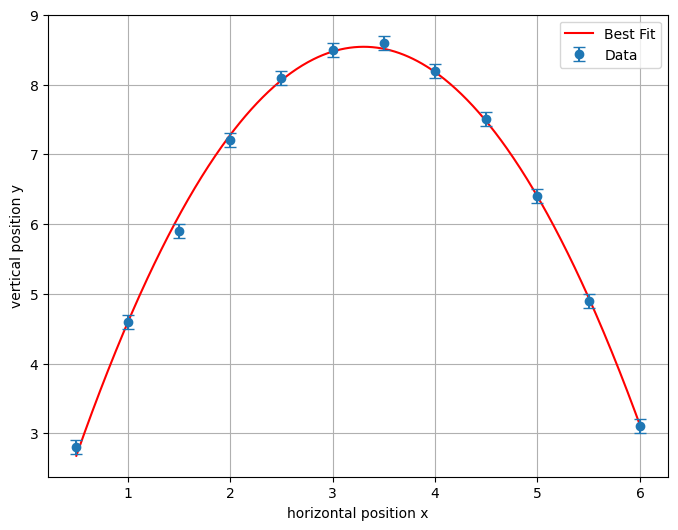

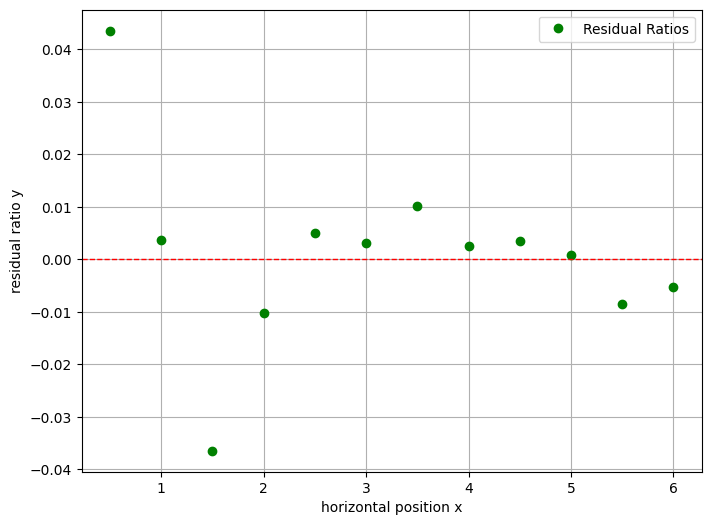

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Store the data from the problem statement in NumPy arrays.
x_data = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])
y_data = np.array([2.8, 4.6, 5.9, 7.2, 8.1, 8.5, 8.6, 8.2, 7.5, 6.4, 4.9, 3.1])


# YOUR CODE HERE
# define quadratic
def quadratic_model(x,a,b,c):
    quadratic = a*(x**2)+ b*x + c 
    return quadratic

# define using curve_fit() 
def fitter(x_values, y_values, y_errors, init):
    popt, pcov = curve_fit(quadratic_model, x_values, y_values, p0 = init, sigma=y_errors, absolute_sigma=True)
    return popt, pcov
    
# initial condition 
init=[1.0, 1.0, 1.0]
yerr = np.full_like(y_data, 0.1)

# our plot 
param, cov = fitter(x_data,y_data, yerr, init)

# best fit parameters with their errors
a,b,c = param
err = np.sqrt(np.diag(cov))

# q.1
print(f"Values of coefficients with their error: ")
print(f"a = {a:.4f} ± {err[0]:.4f}")
print(f"b = {b:.4f} ± {err[1]:.4f}")
print(f"c = {c:.4f} ± {err[2]:.4f}")

# q.2(a) 
plt.figure(figsize=(8, 6))
x_plot = np.linspace(min(x_data), max(x_data), 500)
y_plot = quadratic_model(x_plot, a,b,c)

plt.plot(x_plot, y_plot,'r-', label='Best Fit')
plt.errorbar(x_data, y_data, yerr=yerr, fmt='o', label='Data', capsize=4)
plt.xlabel("horizontal position x")
plt.ylabel("vertical position y")
plt.legend()
plt.grid(True)
plt.show()

# q.2(b)
res_y = quadratic_model(x_data, a,b,c)
res = (y_data - res_y)/y_data

plt.figure(figsize=(8, 6))
plt.plot(x_data, res, 'go', label='Residual Ratios')
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.xlabel("horizontal position x")
plt.ylabel("residual ratio y")
plt.legend()
plt.grid(True)
plt.show()